<a href="https://colab.research.google.com/github/adhimkhairilanam/SUBMISSIONBDSBIKERSHARERING/blob/main/Proyek_Analisis_Data_Dengan_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: [day.csv]
- **Nama:** [Adhim Khairil Anam]
- **Email:** [mc179d5y0334@student.devacademy.id]
- **ID Dicoding:** [MC179D5Y0334]

## Menentukan Pertanyaan Bisnis

- Berapa banyak peminjaman sepeda pada hari kerja dibandingkan dengan akhir pekan dan hari libur?
- Bagaimana pola peminjaman sepeda pada hari kerja dibandingkan dengan akhir pekan?
- Bagaimana dampak peristiwa cuaca terhadap jumlah peminjaman perhari?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
df_hour= pd.read_csv("hour.csv")
df_hour

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [3]:
df_day = pd.read_csv("day.csv")
df_day

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


1. Ada 2 tabel yang dimana terdapat tabel peminjam sepeda berdasarkan jam dan juga hari
2. Kemudian terdapat bagian penting dari readme yaitu:
cuaca :
1: Cerah, Sedikit awan, Berawan sebagian, Berawan sebagian
2: Kabut + Berawan, Kabut + Awan pecah, Kabut + Sedikit awan, Kabut
3: Salju Ringan, Hujan Ringan + Badai Petir + Awan berserakan, Hujan Ringan + Awan berserakan
4: Hujan Lebat + Butiran Es + Badai Petir + Kabut, Salju + Kabut



### Assessing Data

In [4]:
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [5]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [6]:
df_hour.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [7]:
df_day.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [8]:
df_hour.duplicated().sum()

0

In [9]:
df_day.duplicated().sum()

0

In [10]:
df_hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [11]:
df_day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight**:

1. Dari hasil assesing data yang saya dapatkan tidak terdapat nilai yang kosong.
2. Dan juga tidak terdapat data yang terduplikat.

### Cleaning Data

In [12]:
df_hour.temp.value_counts()

,count
temp,
0.62,726
0.66,693
0.64,692
0.70,690
0.60,675
0.36,671
0.34,645
0.30,641
0.40,614


In [13]:
df_day.temp.value_counts()

,count
temp,
0.635000,5
0.265833,5
0.680000,4
0.710833,4
0.564167,4
...,...
0.669167,1
0.643333,1
0.707059,1


**Insight:**
- Karena Data nya bersih jadi tidak perlu melakukan cleaning data lagi

## Exploratory Data Analysis (EDA)

### Explore ...

Pertanyaan Pertama

In [14]:
df_hour[['weekday','holiday','workingday']].describe()

,weekday,holiday,workingday
count,17379.000000,17379.000000,17379.000000
mean,3.003683,0.028770,0.682721
std,2.005771,0.167165,0.465431
min,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000
50%,3.000000,0.000000,1.000000
75%,5.000000,0.000000,1.000000
max,6.000000,1.000000,1.000000


In [15]:
df_day[['weekday','holiday','workingday']].describe()

,weekday,holiday,workingday
count,731.000000,731.000000,731.000000
mean,2.997264,0.028728,0.683995
std,2.004787,0.167155,0.465233
min,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000
50%,3.000000,0.000000,1.000000
75%,5.000000,0.000000,1.000000
max,6.000000,1.000000,1.000000


**Insight:**
- Paling banyak adalah workingday dengan mean 0.6827 - 0.6839 → Artinya, hari kerja lebih dominan dalam dataset dibandingkan hari libur.
- Paling sedikit adalah holiday, karena hanya sekitar 2,87% dari total data yang merupakan hari libur.
- Weekday lebih merata, karena 50% dari data memiliki nilai weekday 3 atau lebih, ini menunjukkan bahwa peminjaman cukup merata pada hari kerja dan akhir pekan.

Pertanyaan Kedua

In [16]:
df_hour[['weekday','holiday']].value_counts()

weekday  holiday
6        0          2512
0        0          2502
3        0          2451
5        0          2439
2        0          2430
4        0          2423
1        0          2122
         1           357
4        1            48
5        1            48
3        1            24
2        1            23
Name: count, dtype: int64

In [17]:
df_day[['weekday','holiday']].value_counts()

weekday  holiday
0        0          105
6        0          105
2        0          103
3        0          103
4        0          102
5        0          102
1        0           90
         1           15
4        1            2
5        1            2
2        1            1
3        1            1
Name: count, dtype: int64

**Insight**

- Peminjaman sepeda lebih banyak terjadi pada hari kerja dibandingkan akhir pekan atau hari libur. Kemungkinan karena sepeda digunakan untuk transportasi utama selama hari kerja, sementara pada akhir pekan atau liburan, penggunaannya berkurang sedikit

Pertanyaan Ketiga

In [18]:
weather = {
    1: "Cerah hingga berawan sebagian",
    2: "Kabut dengan berbagai tingkat awan",
    3: "Hujan ringan atau salju ringan",
    4: "Hujan lebat, badai petir, atau salju",
}

# Tambah kolom deskripsi cuaca ke dataset
df_day['cuaca'] = df_day['weathersit'].map(weather)

# Hasil
df_day[['weathersit', 'cuaca']]


,weathersit,cuaca
0,2,Kabut dengan berbagai tingkat awan
1,2,Kabut dengan berbagai tingkat awan
2,1,Cerah hingga berawan sebagian
3,1,Cerah hingga berawan sebagian
4,1,Cerah hingga berawan sebagian
...,...,...
726,2,Kabut dengan berbagai tingkat awan
727,2,Kabut dengan berbagai tingkat awan
728,2,Kabut dengan berbagai tingkat awan
729,1,Cerah hingga berawan sebagian


In [19]:
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,cuaca
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,Kabut dengan berbagai tingkat awan
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,Kabut dengan berbagai tingkat awan
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,Cerah hingga berawan sebagian
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,Cerah hingga berawan sebagian
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,Cerah hingga berawan sebagian


In [20]:
df_day.groupby('cuaca').agg({
    'casual': 'sum',
    'registered': 'sum',
    'cnt': ['sum','mean']
})

casual registered      cnt             
                                       sum        sum      sum         mean
cuaca                                                                      
Cerah hingga berawan sebagian       446346    1811606  2257952  4876.786177
Hujan ringan atau salju ringan        3895      33974    37869  1803.285714
Kabut dengan berbagai tingkat awan  169776     827082   996858  4035.862348

**Insight**

- Berdasarkan hasil yang didapat, jumlah peminjam tertinggi terjadi saat cuaca cerah hingga berawan sebagian. Kondisi ini diikuti oleh kabut dengan berbagai tingkat awan, yang memiliki jumlah peminjam lebih sedikit. Sementara itu, peminjaman paling rendah terjadi pada kondisi hujan ringan atau salju ringan. Hal ini menunjukkan bahwa kondisi cuaca memang memengaruhi tingkat penggunaan sepeda.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

<ipython-input-21-8beedd6c13c2>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=peminjaman_jumlah, palette='viridis', ax=axes[0])
<ipython-input-21-8beedd6c13c2>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=peminjaman_rerata, palette='viridis', ax=axes[1])


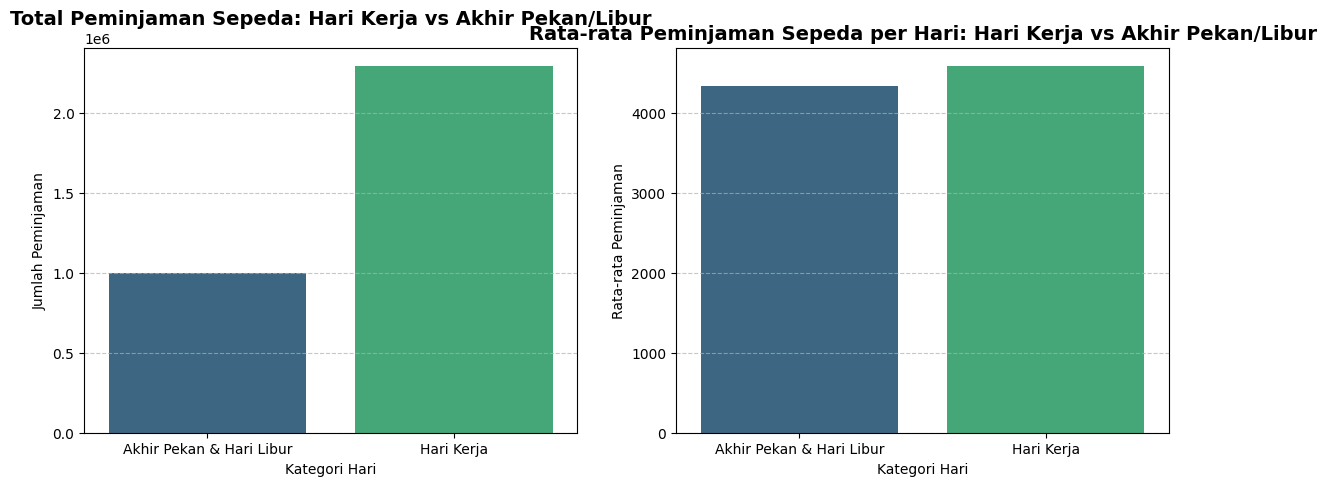

In [21]:
peminjaman_jumlah = df_day.groupby('workingday')['cnt'].sum()
peminjaman_rerata = df_day.groupby('workingday')['cnt'].mean()

# Menentukan label untuk sumbu x
labels = ['Akhir Pekan & Hari Libur', 'Hari Kerja']

# Membuat visualisasi
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Grafik jumlah peminjaman sepeda
sns.barplot(x=labels, y=peminjaman_jumlah, palette='viridis', ax=axes[0])
axes[0].set_title('Total Peminjaman Sepeda: Hari Kerja vs Akhir Pekan/Libur', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Kategori Hari')
axes[0].set_ylabel('Jumlah Peminjaman')
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Grafik rata-rata peminjaman sepeda
sns.barplot(x=labels, y=peminjaman_rerata, palette='viridis', ax=axes[1])
axes[1].set_title('Rata-rata Peminjaman Sepeda per Hari: Hari Kerja vs Akhir Pekan/Libur', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Kategori Hari')
axes[1].set_ylabel('Rata-rata Peminjaman')
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

<ipython-input-22-f68df5ef14d4>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=peminjaman_jumlah, palette='viridis', ax=axes[0])
<ipython-input-22-f68df5ef14d4>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=peminjaman_rerata, palette='viridis', ax=axes[1])


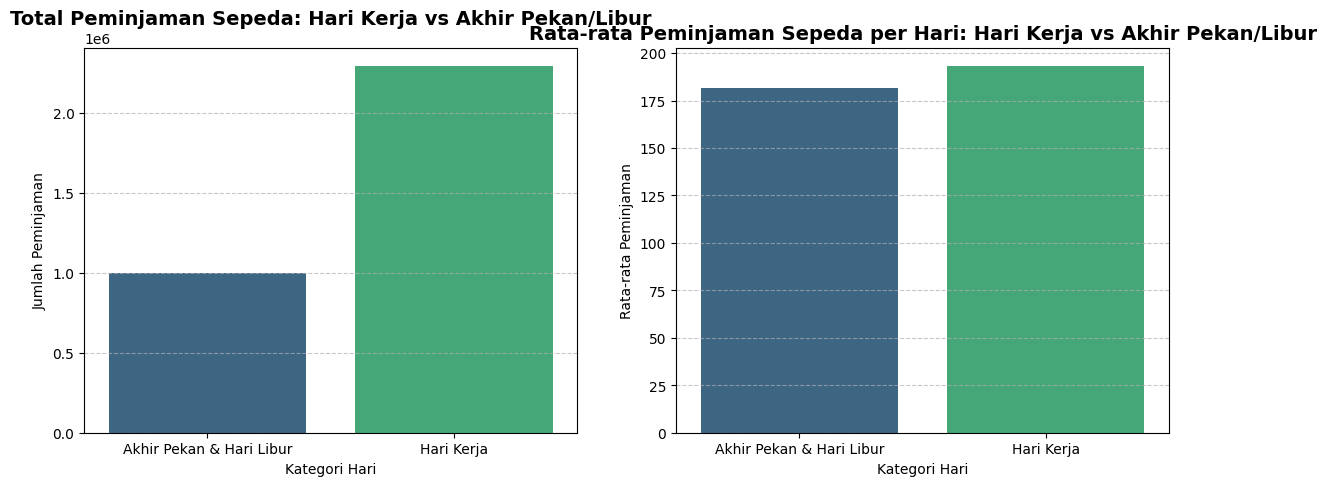

In [22]:
peminjaman_jumlah = df_hour.groupby('workingday')['cnt'].sum()
peminjaman_rerata = df_hour.groupby('workingday')['cnt'].mean()

# Menentukan label untuk sumbu x
labels = ['Akhir Pekan & Hari Libur', 'Hari Kerja']

# Membuat visualisasi
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Grafik jumlah peminjaman sepeda
sns.barplot(x=labels, y=peminjaman_jumlah, palette='viridis', ax=axes[0])
axes[0].set_title('Total Peminjaman Sepeda: Hari Kerja vs Akhir Pekan/Libur', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Kategori Hari')
axes[0].set_ylabel('Jumlah Peminjaman')
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Grafik rata-rata peminjaman sepeda
sns.barplot(x=labels, y=peminjaman_rerata, palette='viridis', ax=axes[1])
axes[1].set_title('Rata-rata Peminjaman Sepeda per Hari: Hari Kerja vs Akhir Pekan/Libur', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Kategori Hari')
axes[1].set_ylabel('Rata-rata Peminjaman')
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

**Insight :**

- Berdasarkan hasil visualisasi, jawaban dari pertanyaan pertama adalah pengguna sepeda weekday, holiday dan workingday terbanyak adalah workingday.


### Pertanyaan 2:

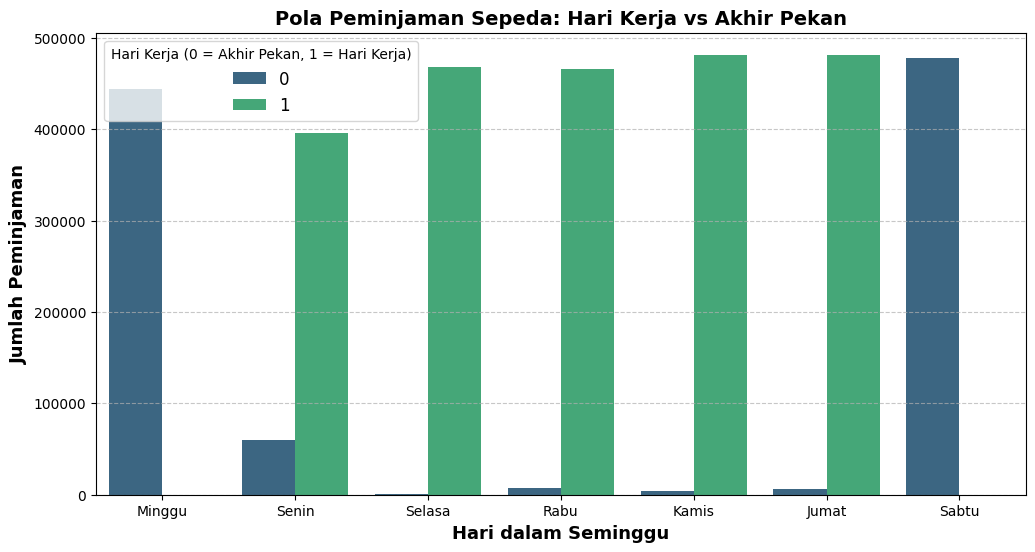

In [23]:
peminjaman_jumlah = df_day.groupby(['weekday', 'workingday'])['cnt'].sum().reset_index()

weekday_labels = ['Minggu', 'Senin', 'Selasa', 'Rabu', 'Kamis', 'Jumat', 'Sabtu']

plt.figure(figsize=(12, 6))
sns.barplot(x='weekday', y='cnt', hue='workingday', data=peminjaman_jumlah, palette='viridis')

plt.xticks(ticks=range(7), labels=weekday_labels)
plt.title("Pola Peminjaman Sepeda: Hari Kerja vs Akhir Pekan", fontsize=14, fontweight="bold")
plt.xlabel("Hari dalam Seminggu", fontsize=13, fontweight="bold")
plt.ylabel("Jumlah Peminjaman", fontsize=13, fontweight="bold")
plt.legend(title="Hari Kerja (0 = Akhir Pekan, 1 = Hari Kerja)", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

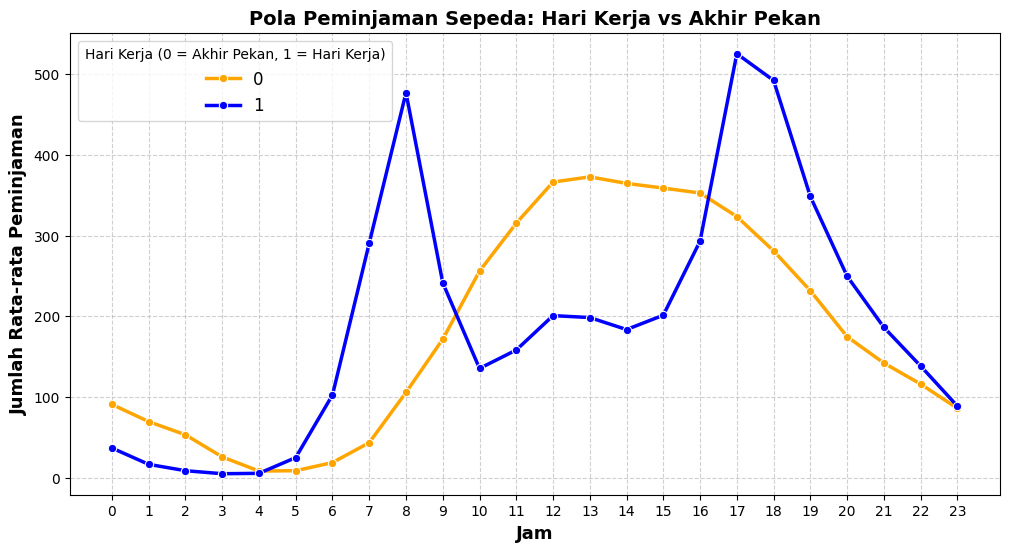

In [24]:
pengguna_jam = df_hour.groupby(["hr", "workingday"])["cnt"].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x="hr", y="cnt", hue="workingday", data=pengguna_jam, marker="o", linewidth=2.5, palette=["orange", "blue"])

plt.title("Pola Peminjaman Sepeda: Hari Kerja vs Akhir Pekan", fontsize=14, fontweight="bold")
plt.xlabel("Jam", fontsize=13, fontweight="bold")
plt.ylabel("Jumlah Rata-rata Peminjaman", fontsize=13, fontweight="bold")
plt.xticks(range(0, 24))
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend(title="Hari Kerja (0 = Akhir Pekan, 1 = Hari Kerja)", fontsize=12)
plt.show()

**Insight:**
- Sepeda lebih sering digunakan sebagai alat transportasi utama pada hari kerja, terutama saat jam sibuk (pagi dan sore).
- Di akhir pekan, peminjaman sepeda lebih merata sepanjang hari, menunjukkan bahwa penggunaan sepeda lebih banyak untuk keperluan rekreasi atau aktivitas yang santai.
- Jumlah peminjaman lebih tinggi pada hari kerja secara keseluruhan, tetapi peminjaman di akhir pekan tetap signifikan, terutama pada hari Minggu.

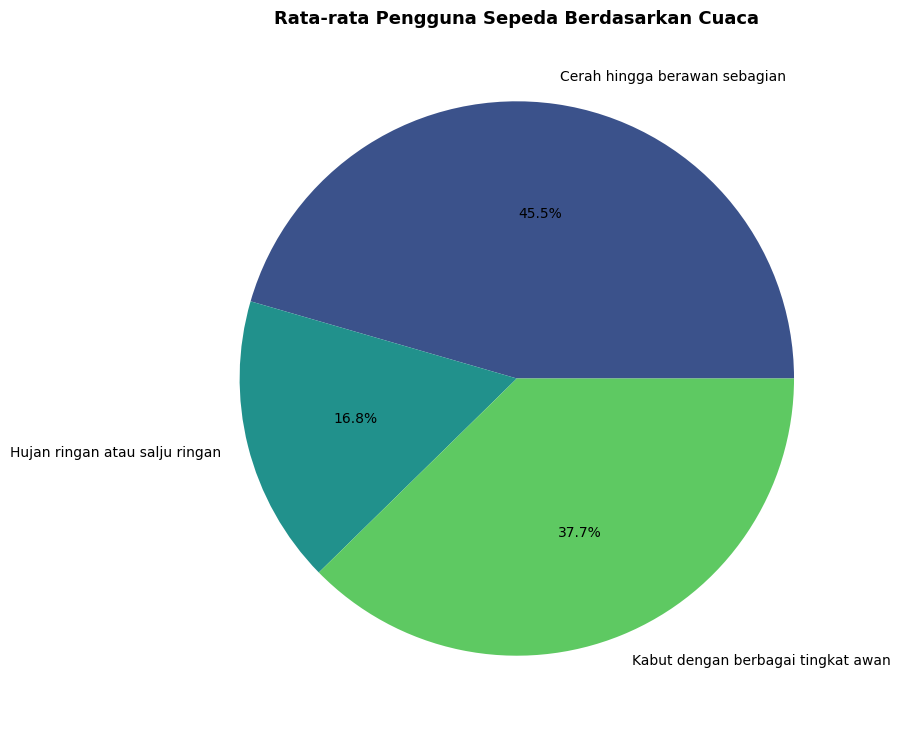

In [25]:
df_Cuace = df_day.groupby('cuaca').agg({
    'casual': 'sum',
    'registered': 'sum',
    'cnt': ['sum','mean']
}).reset_index()
df_Cuace.columns = ['cuaca', 'casual', 'registered', 'cnt_sum', 'cnt_mean']
plt.figure(figsize=(9, 9))
plt.pie(df_Cuace['cnt_mean'], labels=df_Cuace['cuaca'], autopct='%1.1f%%', colors=sns.color_palette("viridis",len(df_Cuace)))
plt.title("Rata-rata Pengguna Sepeda Berdasarkan Cuaca",fontsize=13,fontweight="bold")
plt.show()

**Insight:**

-Berdasarkan hasil gambar diatas, cuaca juga mempengaruhi pengguna sepeda untuk melakukan kegiatan, pada saat cuaca cerah, dan berawan sebagian mempunyai presentase tertinggi dengan nilai 45.5%

## Analisis Lanjutan (Opsional)

**CLUSTERING**
Saya akan mengelompokkan pengguna sepeda berdasarkan musim, cuaca, dan banyak jumlah pengguna sepeda

In [26]:
kategori_musim = {
    1: "Pengguna sangat sedikit",
    2: "Pengguna banyak",
    3: "Pengguna sangat banyak",
    4: "Pengguna sedikit",
}

df_day["Kategori"] = df_day["season"].replace(kategori_musim)

df_day

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,cuaca,Kategori
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,Kabut dengan berbagai tingkat awan,Pengguna sangat sedikit
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,Kabut dengan berbagai tingkat awan,Pengguna sangat sedikit
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,Cerah hingga berawan sebagian,Pengguna sangat sedikit
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,Cerah hingga berawan sebagian,Pengguna sangat sedikit
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,Cerah hingga berawan sebagian,Pengguna sangat sedikit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114,Kabut dengan berbagai tingkat awan,Pengguna sangat sedikit
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095,Kabut dengan berbagai tingkat awan,Pengguna sangat sedikit
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341,Kabut dengan berbagai tingkat awan,Pengguna sangat sedikit
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796,Cerah hingga berawan sebagian,Pengguna sangat sedikit


**Insight:**

- Dengan dilakukan clustering ini, dengan cara membuat nama kategori untuk mengelompokkan pengguna sepeda terbanyak sesuai musim dan kita bisa mengetahui musim mana yang paling banyak digunakan untuk bersepeda dan mengambil keputusan berdasarkan tren musiman tersebut.

**Bining**

In [27]:
jumlah_bins = [0, 2000, 4000, df_day["cnt"].max()]
jumlah_labels = ["Rendah","Menengah","Tinggi"]
df_day["jumlah_kategori"] = pd.cut(df_day["cnt"], bins=jumlah_bins, labels=jumlah_labels)


In [28]:
suhu_bins=[0, 0.3, 0.6, df_day["temp"].max()]
suhu_labels = ["Dingin","Sedang","Panas"]
df_day["suhu_kategori"] = pd.cut(df_day["temp"], bins=suhu_bins, labels=suhu_labels)


In [29]:
df_day

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,cuaca,Kategori,jumlah_kategori,suhu_kategori
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,Kabut dengan berbagai tingkat awan,Pengguna sangat sedikit,Rendah,Sedang
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,Kabut dengan berbagai tingkat awan,Pengguna sangat sedikit,Rendah,Sedang
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,Cerah hingga berawan sebagian,Pengguna sangat sedikit,Rendah,Dingin
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,Cerah hingga berawan sebagian,Pengguna sangat sedikit,Rendah,Dingin
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,Cerah hingga berawan sebagian,Pengguna sangat sedikit,Rendah,Dingin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114,Kabut dengan berbagai tingkat awan,Pengguna sangat sedikit,Menengah,Dingin
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095,Kabut dengan berbagai tingkat awan,Pengguna sangat sedikit,Menengah,Dingin
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341,Kabut dengan berbagai tingkat awan,Pengguna sangat sedikit,Rendah,Dingin
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796,Cerah hingga berawan sebagian,Pengguna sangat sedikit,Rendah,Dingin


<ipython-input-30-132a6a4e122b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_day["jumlah_kategori"], palette="coolwarm")


Text(0, 0.5, 'Jumlah Hari')

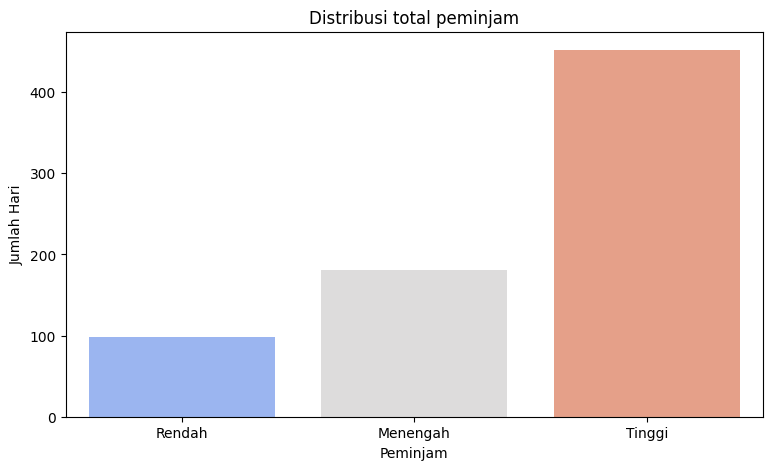

In [30]:
plt.figure(figsize=(9, 5))
sns.countplot(x=df_day["jumlah_kategori"], palette="coolwarm")
plt.title("Distribusi total peminjam")
plt.xlabel("Peminjam")
plt.ylabel("Jumlah Hari")

<ipython-input-31-0d3e46114ac1>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_day["suhu_kategori"], palette="coolwarm")


Text(0, 0.5, 'Jumlah Hari')

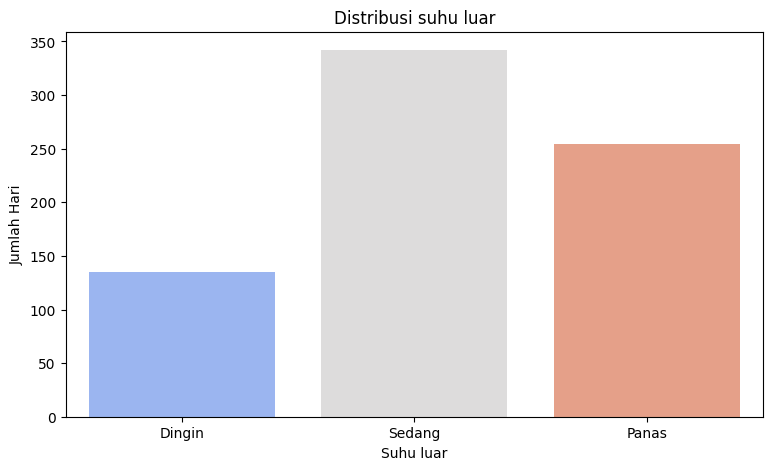

In [31]:
plt.figure(figsize=(9, 5))
sns.countplot(x=df_day["suhu_kategori"], palette="coolwarm")
plt.title("Distribusi suhu luar")
plt.xlabel("Suhu luar")
plt.ylabel("Jumlah Hari")

**Insight:**

- Berdasarkan hasil Binning yang di lakukan, saya menggunakan 2 parameter yaitu temp dan total peminjam, untuk didaptkan kelompok Sedang memiliki jumlah hari terbanyak, menunjukkan bahwa suhu sedang adalah kondisi yang paling sering terjadi dan peminjam cenderung menggunakan sepeda pada saat suhu yang tidak panas dan tidak dingin(sedang).

## Conclusion

In [32]:
df_hour.to_csv("df_hour.csv", index=False)

In [33]:
df_day.to_csv("df_day.csv", index=False)

1. Conclution pertanyaan 1:
- peminjaman sepeda terbanyak pada hari kerja dibandingkan dengan akhir pekan dan hari libur adalah workingday (hari kerja) dengan mean 0.6827 - 0.6839

2. Conclution pertanyaan 2:
- Peminjaman sepeda lebih banyak terjadi pada hari kerja terbanyak terjadi di angka 6 dibandingkan akhir pekan atau hari libur

3. Conclution pertanyaan 3:
- Pada saat cuaca cerah,sedikit berawan, dan berawan sebagian mempunyai presentase tertinggi dengan nilai 45.5%

4. Manual Grupping(Berdasarkan Cuaca):
Melakukan clustering atau pengelompokan berdasarkan analisis sebelumnya dengan cara membuat nama kategori,yang bermaksud untuk menandakan/mengelompokkan pengguna sepeda terbanyak berdasarkan musim.

5. Bining :
Menggunakan 2 parameter yaitu temp dan total peminjam, untuk didaptkan kelompok Sedang memiliki jumlah hari terbanyak, menunjukkan bahwa suhu sedang adalah kondisi yang paling sering terjadi dan peminjam cenderung menggunakan sepeda pada saat suhu yang tidak panas dan tidak dingin(sedang).


6. Kesimpulan & Rekomendasi
Dari analisis yang dilakukan, terlihat bahwa peminjaman sepeda lebih banyak terjadi pada hari kerja dibandingkan akhir pekan atau hari libur. Hari dengan jumlah peminjaman tertinggi memiliki nilai weekday 6. Selain itu, cuaca juga berpengaruh, di mana peminjaman sepeda paling banyak terjadi saat cuaca cerah hingga berawan sebagian, dengan persentase mencapai 45.5%. Dari segi suhu, pengguna lebih cenderung menyewa sepeda saat suhu berada di tingkat sedang, tidak terlalu panas maupun terlalu dingin.

Ada beberapa hal yang bisa diterapkan untuk meningkatkan layanan penyewaan sepeda. Pertama, jumlah sepeda dapat ditambah pada hari kerja, terutama pada hari dengan jumlah penyewaan tertinggi. Kedua, pemberian diskon atau promo saat cuaca ekstrem bisa menjadi strategi untuk menjaga minat pengguna. Selain itu, menampilkan prakiraan cuaca di aplikasi penyewaan juga bisa membantu pelanggan merencanakan perjalanan mereka.